In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import json

In [28]:
sns.set_palette(sns.color_palette("colorblind"))

In [29]:
data_root = '../../data/gaia/raw/'
results_root = '../../results/cluster_files/'

In [30]:
df = pd.read_hdf(os.path.join(data_root, 'common_kinematics_10kpc.h5'), key='star')
print(df.keys())

np.random.seed(0)
keep_idx = np.random.choice(len(df), 3000, replace=False)
print(keep_idx)
df = df.iloc[keep_idx]

Index(['Etot', 'JR', 'Jphi', 'Jz', 'Lx', 'Ly', 'ecc', 'U', 'V', 'vr', 'W',
       'vphi', 'XGC', 'YGC', 'ZGC', 'zmax', 'source_id', 'RGC', 'Vtot',
       'PhiGC'],
      dtype='object')
[ 1650 27642 73310 ...  4380 57920 12766]


In [37]:
labels = pd.read_csv(os.path.join(results_root, 'gaia_stitch_snc_mom_random_sparsification_3000.csv'))
print(len(labels))

3000


In [38]:
def plot(df, clusters, fig_name, fig_path = '../../', sample_size = None, norm=False):
    if sample_size is not None:
        sampled_ids = np.random.choice(len(clusters), sample_size, replace=False)
        df = df.iloc[sampled_ids]
        clusters = clusters[sampled_ids]
    clusters = [f'cluster {i}' for i in clusters]
    fig, axs = plt.subplots(ncols=3,nrows=3,figsize=(15, 15))
    axs = axs.flatten()
    sns.scatterplot(data=df, x='Jphi', y='Etot', hue=clusters, style=clusters, s=10, ax=axs[0])
    sns.scatterplot(data=df, x='vr', y='vphi', hue=clusters, style=clusters, s=10, ax=axs[1])
    sns.scatterplot(data=df, x='vr', y='W', hue=clusters, style=clusters, s=10, ax=axs[2])
    J = np.sqrt(df['Jphi']**2 + df['JR']**2 + df['Jz']**2)
    sns.scatterplot(x=df['Jphi']/J, y=(df['Jz']-df['JR'])/J, hue=clusters, style=clusters, s=10, ax=axs[3])
    sns.scatterplot(data=df, x='JR', y='Jphi', hue=clusters, style=clusters, s=10, ax=axs[4])
    sns.scatterplot(data=df, x='JR', y='Jz', hue=clusters, style=clusters, s=10, ax=axs[5])
    if norm:
        axs[4].set(xlim=(0,2))
        axs[5].set(xlim=(0,2))
    else:
        axs[4].set(xlim=(0, 8000))
        axs[5].set(xlim=(0, 8000))
    if 'RGC' in df.keys(): # needs to change keys
        sns.scatterplot(data=df, x='RGC', y='ZGC', hue=clusters, style=clusters, s=10, ax=axs[6])
        #df['PhiGC'] *= np.pi / np.max(df['PhiGC'].to_numpy())
        sns.scatterplot(data=df, x='PhiGC', y='RGC', hue=clusters, style=clusters, s=10, ax=axs[7])
        L = np.cross(df[['XGC', 'YGC', 'ZGC']].to_numpy(), df[['U', 'V', 'W']].to_numpy())
        sns.scatterplot(x=L[:,2], y=L[:,1], hue=clusters, style=clusters, s=10, ax=axs[8])
    fig.savefig(os.path.join(fig_path, fig_name))

In [39]:
def normalize(df):
    df_ = df.copy(deep=True)
    raw_path = os.path.join(data_root, 'common_kinematics_10kpc.h5')
    with open(raw_path[:-3]+'_norm.json', 'r') as f:
        df_norm = json.load(f)
    if 'Etot' in df_.keys():
        df_['Etot'] -= df_norm['mean']['Etot']
    for feature in df_norm['std'].keys():
        df_[feature] /= df_norm['std'][feature]
    return df_

In [40]:
df_ = normalize(df)

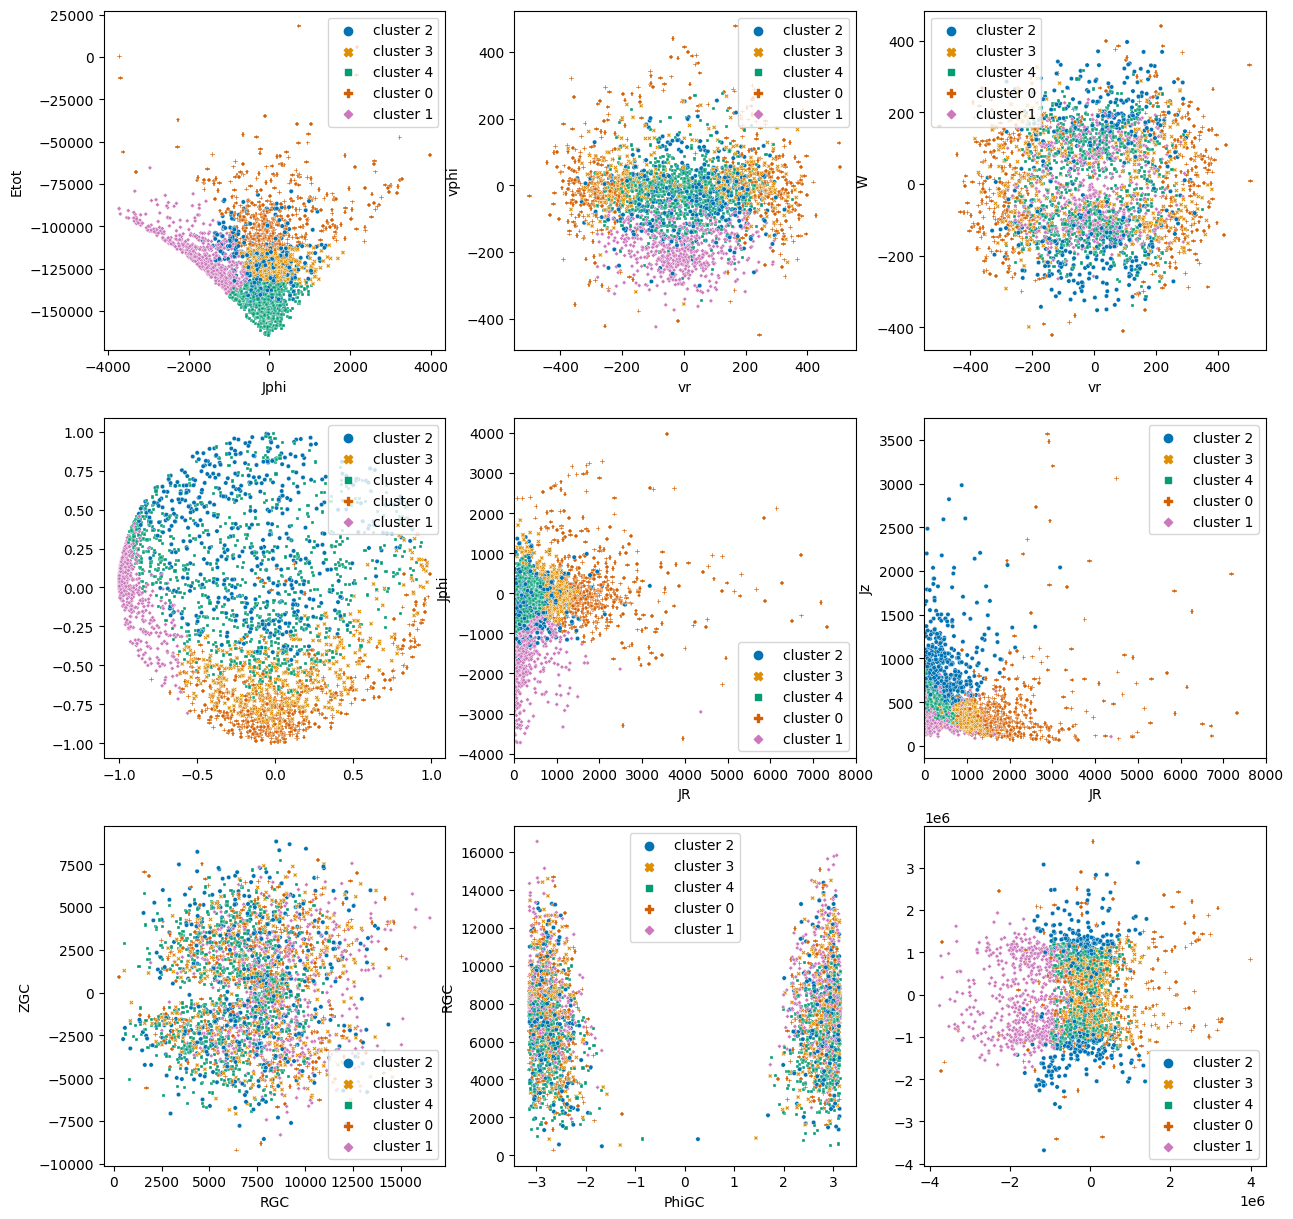

In [42]:
plot(df, labels['cluster_id'].to_numpy(), fig_name='gaia_stitch_snc_mom_plot_random_sparsification_3000.png', sample_size=3000, norm=False)